# Predicting client subscription for a bank term deposit 


##### This project is divided into 5 sections:
##### 1.Introduction
##### 2.Exploring The Data
##### 3.Exploratory Data Analysis
* 3.1 Describing Features
* 3.2 Descriptive Figures
	* 3.2.1 Distribution Plots/Boxplots
	* 3.2.2 Using IQR rule to identify potential outliers
	* 3.2.3 Cross-Correlation Plot
	* 3.2.4 Distribution Plot With Respect To The Target Feature
* 3.3 Skewed Features
	* 3.3.1 Skewed Features: Log Transform
	* 3.3.2 Normalization Of Numerical Features
    * 3.3.3 Processing Categorical Feature: One Hot- Encoding
    
##### 4.Model Selection
* 4.1 Training And Testing Datasets
* 4.2 Model Selection
* 4.3 Confusion Matrix, Precision, Recall, F1-Score

##### 5.Actionable Recommendations


# ---- 1.Introduction ----

###### 1.This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

###### 2.The dataset used is "bank-additional-full.csv" with all examples, ordered by date (from May 2008 to November 2010).

###### 3.The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

###### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the   Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001


In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline


#my_details 
__author__ = "sreetam dev"
__email__  = "sreetamkumardev@gmail.com"

# ---- 2.Exploring the data  ----

###### There is one dataset associoated with our task. The strategy is to perform explanatory data analysis before separating into training and test sets before performing machine learning.

In [2]:
#loading the data 
df_bank = pd.read_csv("bank-additional-full.csv", sep = ";")
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_bank.info()   #fetching data types and length of  data entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_bank.isnull().any()   # searching if there are any null values that require imputation. 

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [5]:
# looking for duplicate instances within our dataset
print("The total no of duplicate records within our dataset are: ", df_bank.duplicated().sum())

The total no of duplicate records within our dataset are:  12


In [6]:
# Removing the duplicated rows from the dataset

df_bank = df_bank.drop_duplicates()

# ---- 3.Exploratory data analysis ----

#### 3.1 Describing The Features

In [7]:
# Observing distribution of the target variable

df_bank_subcribers_rate     = (len(df_bank[df_bank['y']== 'yes'])/ df_bank.shape[0])*100
df_bank_non_subcribers_rate = (len(df_bank[df_bank['y']== 'no'])/ df_bank.shape[0])*100
print("Percentage of subscribers{}, Percentage of non-subscribers {}".format( df_bank_subcribers_rate, df_bank_non_subcribers_rate))


Percentage of subscribers11.266271614532737, Percentage of non-subscribers 88.73372838546726


In [8]:
# fetching summary of numerical and categorical features

df_bank.describe(include = [np.number])


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### We can find out that the distribution of the features  seem to have skeweness . Although we will still investigate by plotting our data. The duration and campaign features represent unusually high maximum values that should be checked for outliers.

In [9]:
df_bank.describe(include = ['O']) # descriptive statistics for categorical features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


#### 3.2 Descriptive Figures

#### 3.2.1 Distribution Plots/Boxplots -  visualising numerical features

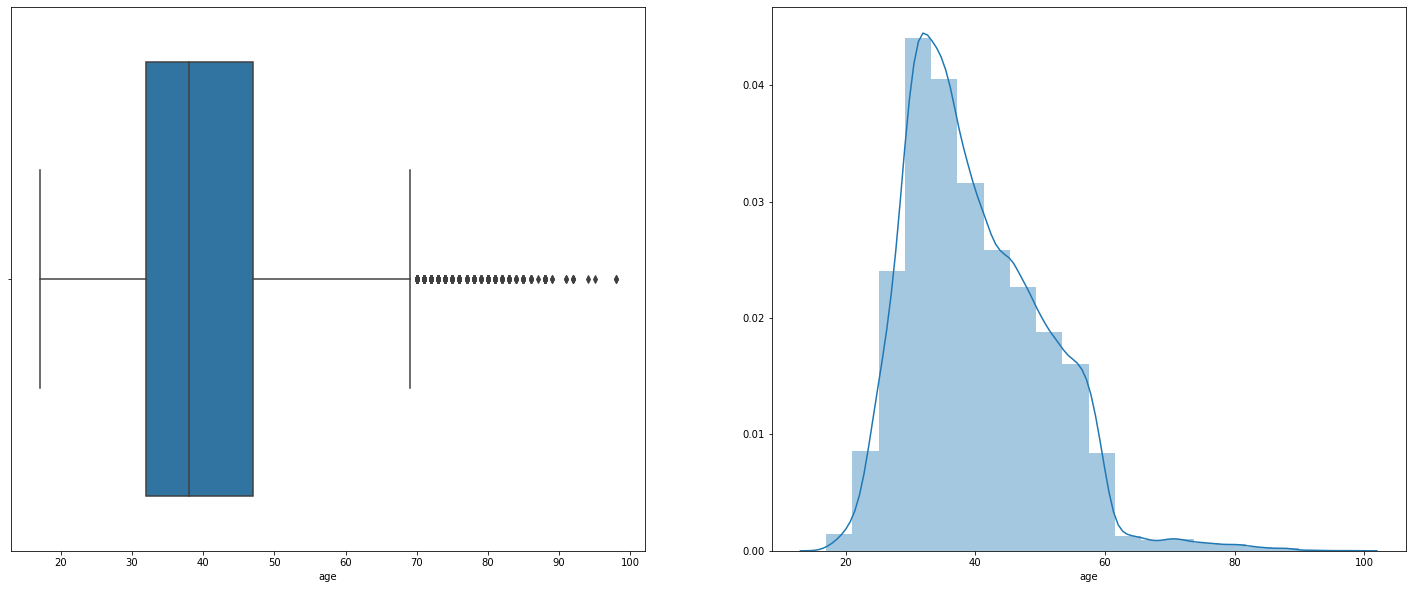

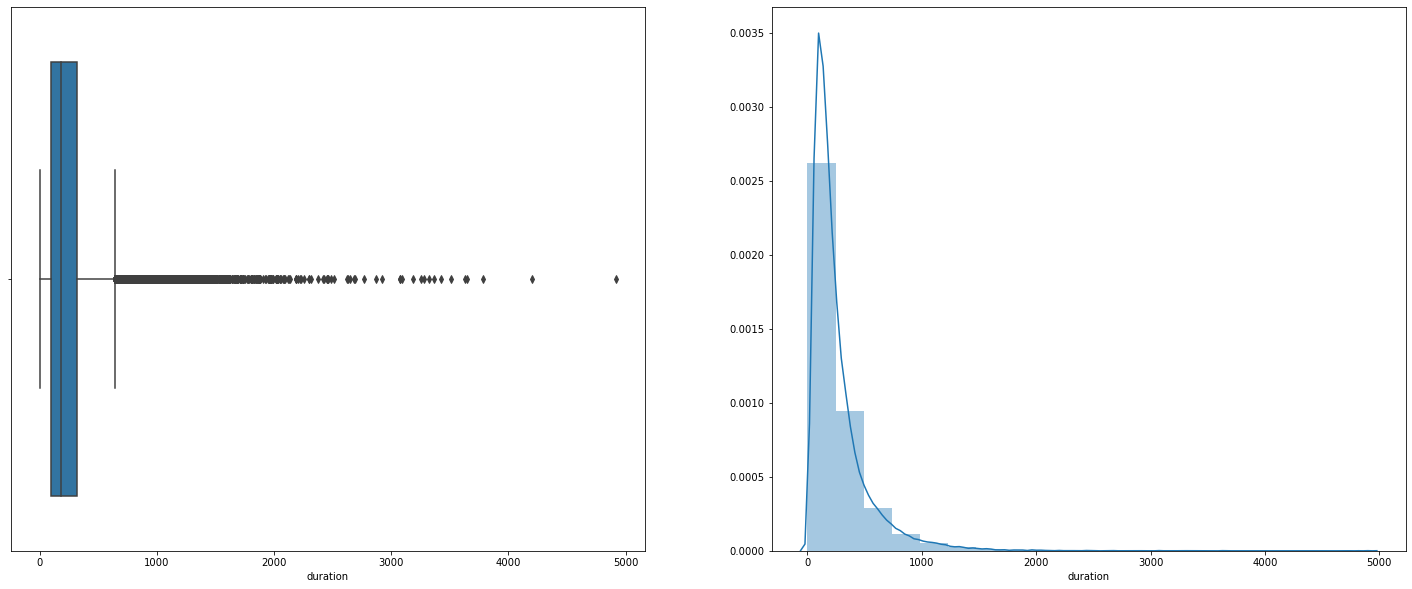

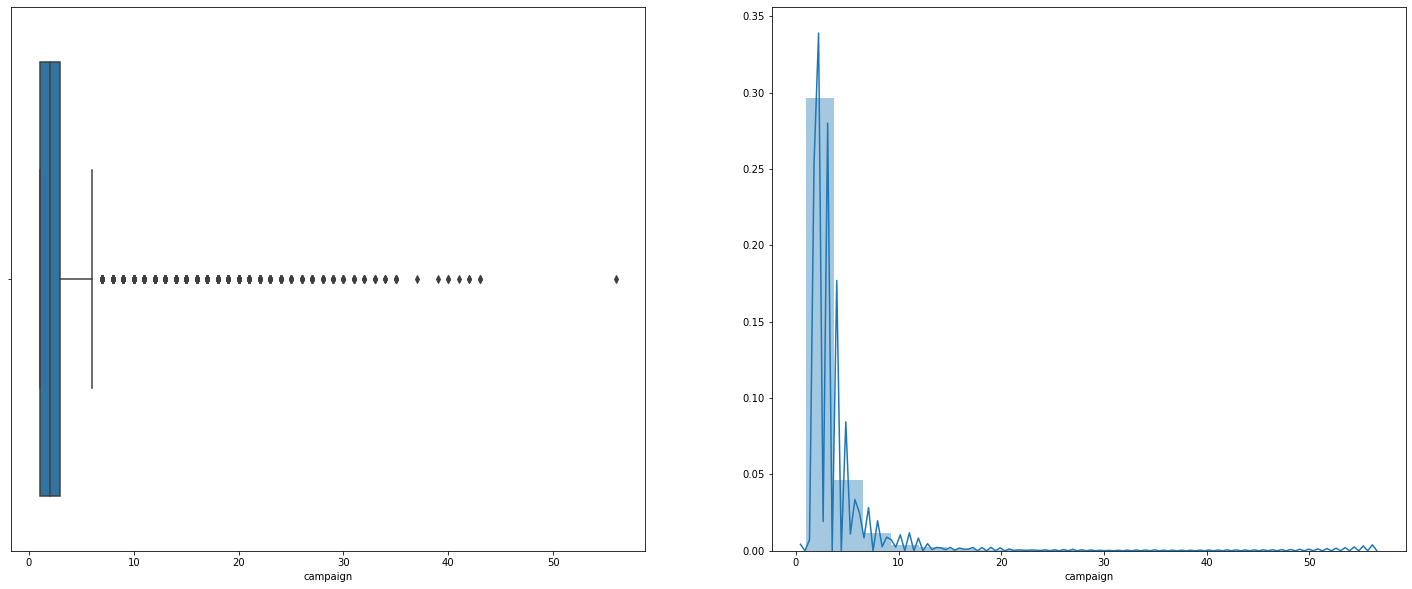

/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


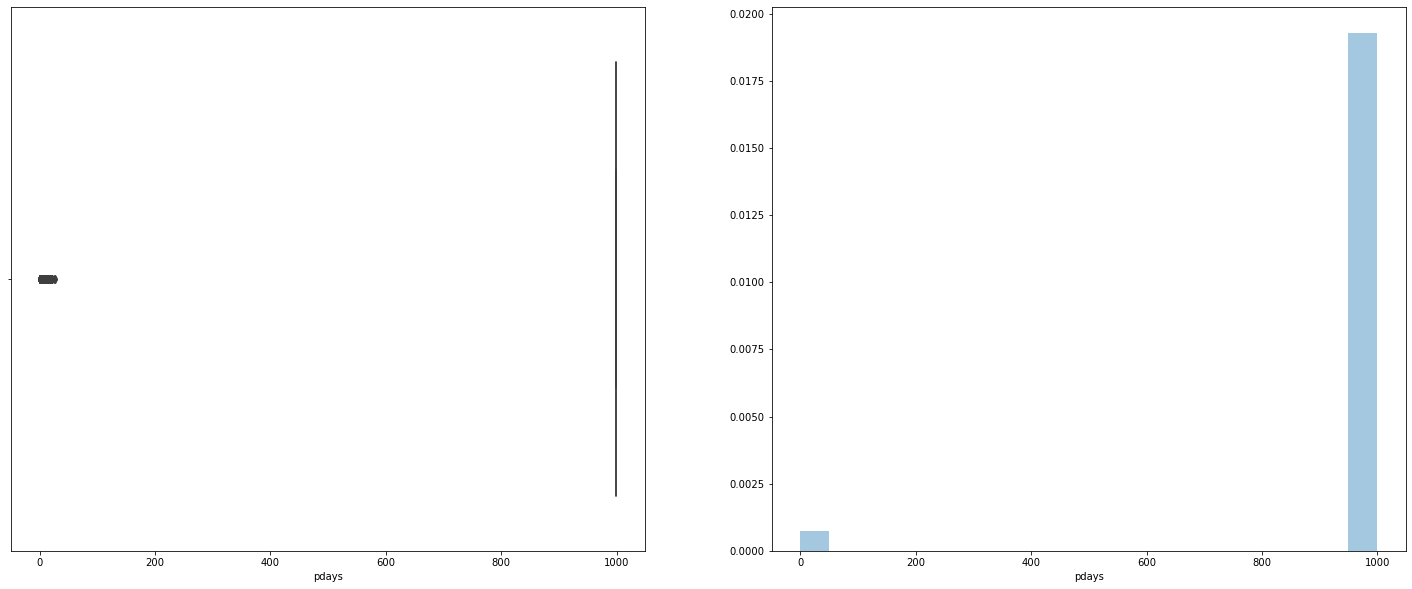

/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


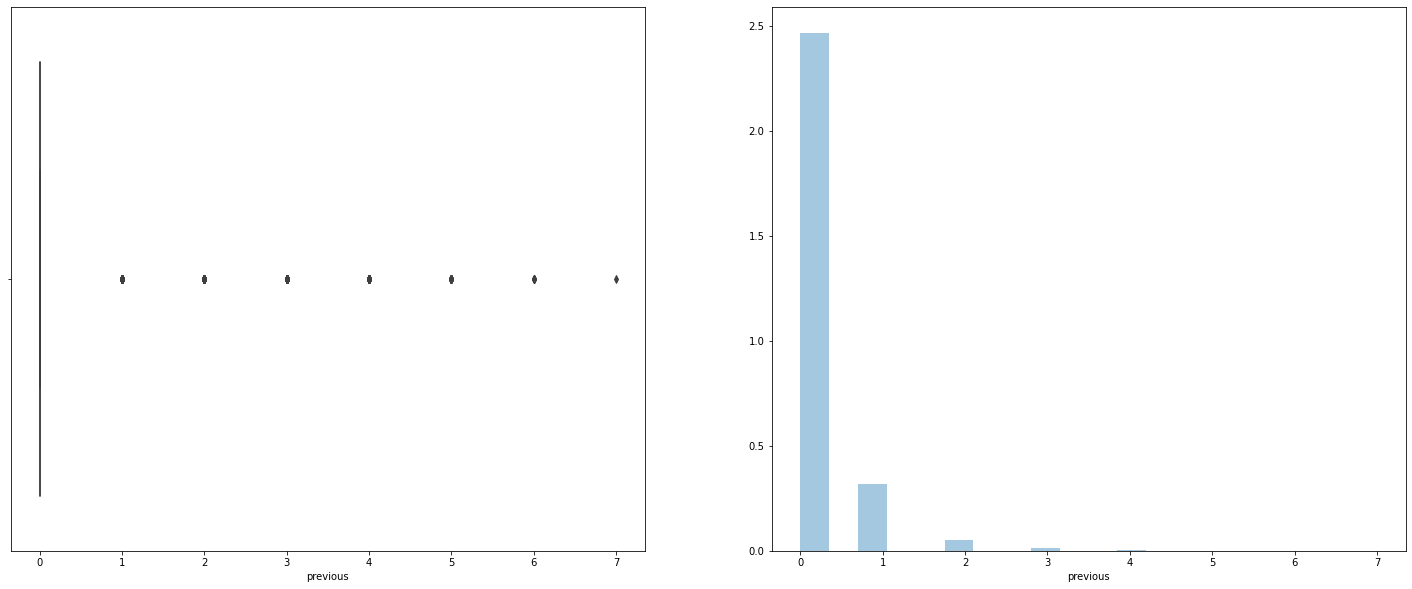

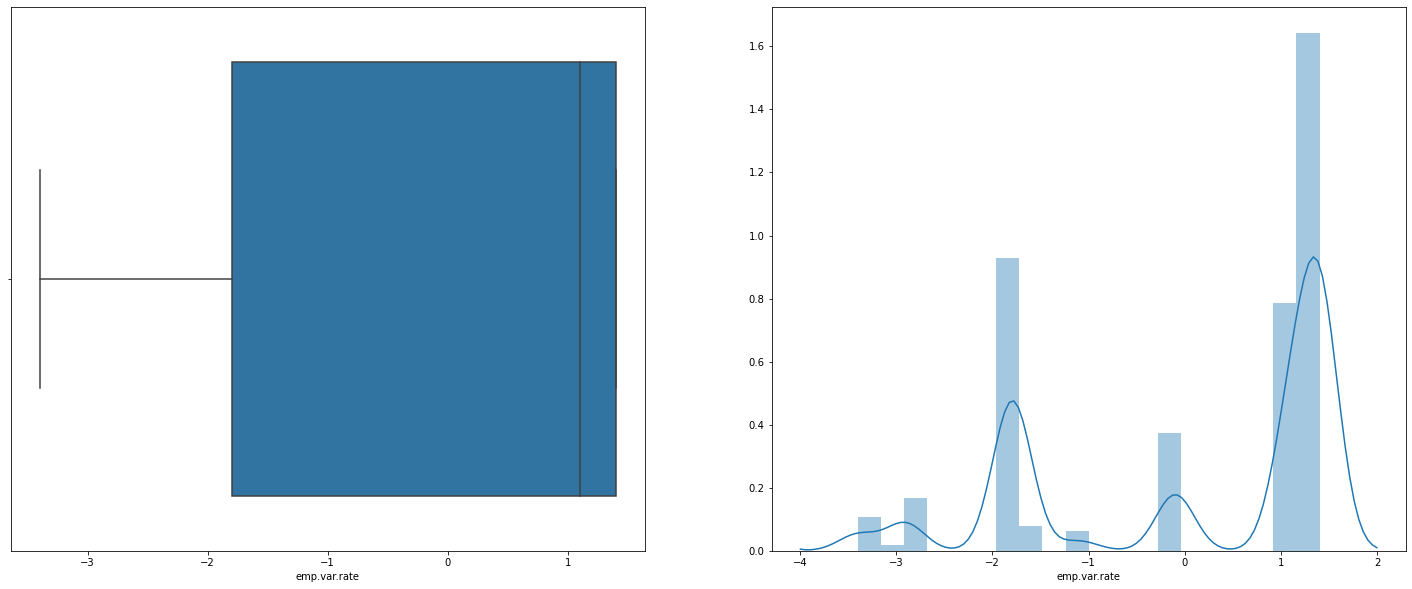

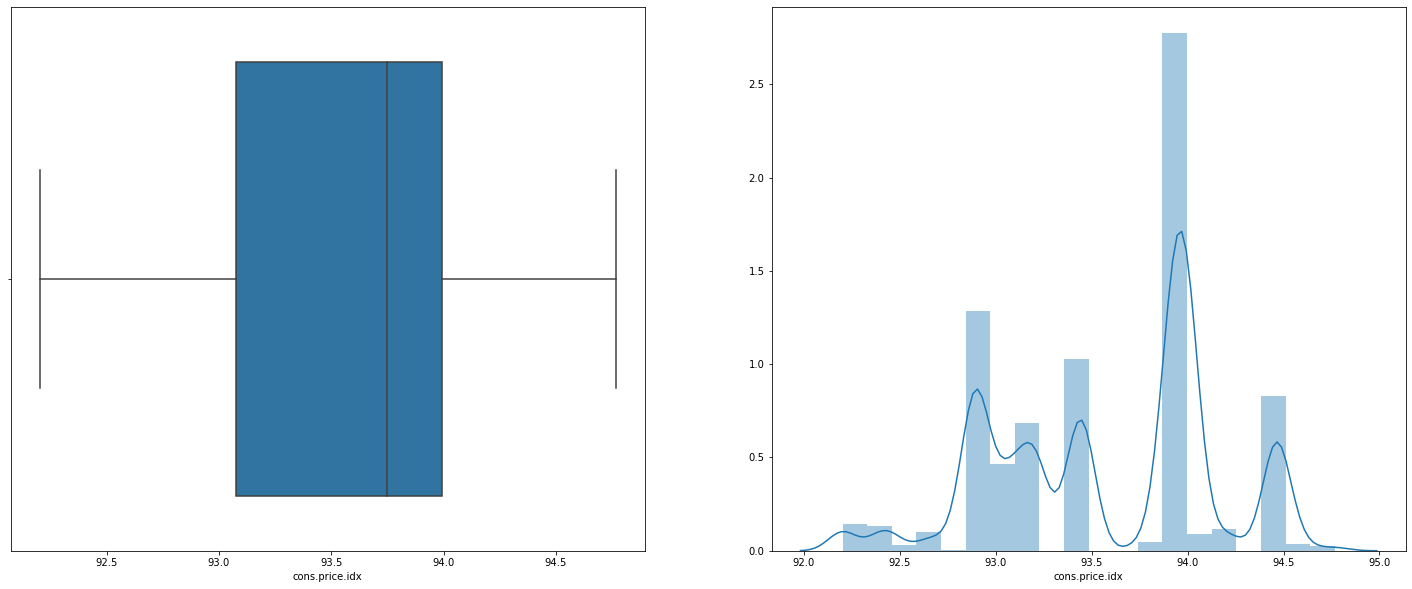

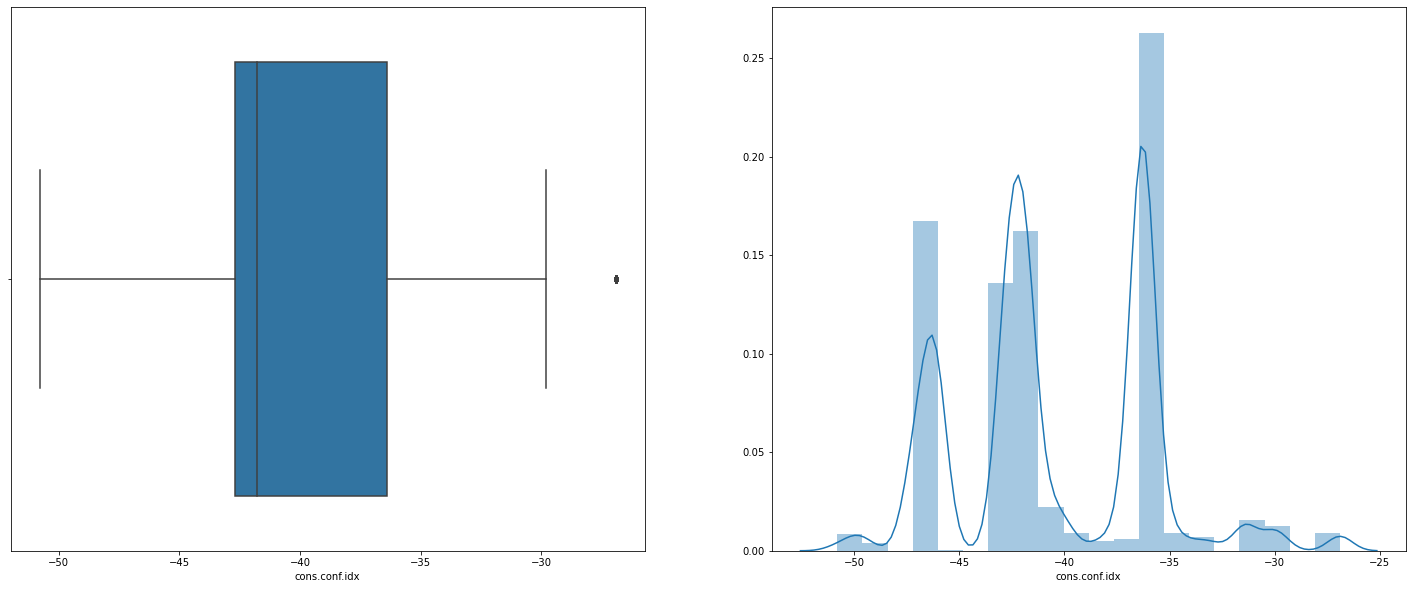

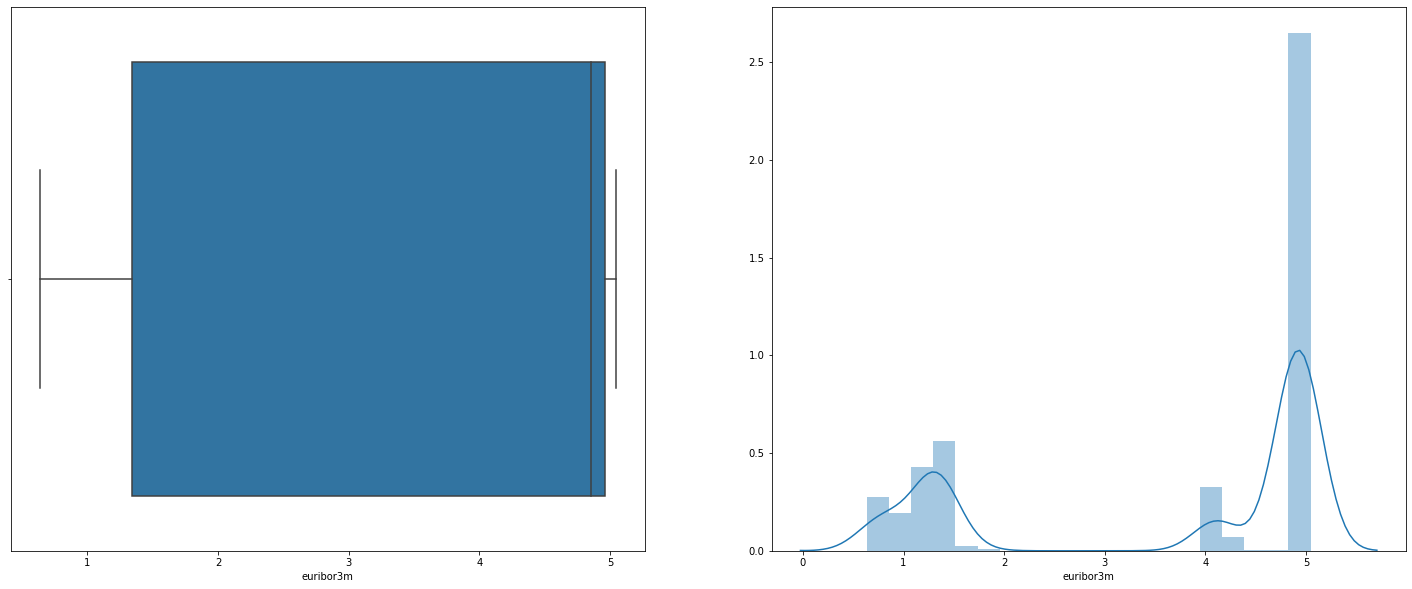

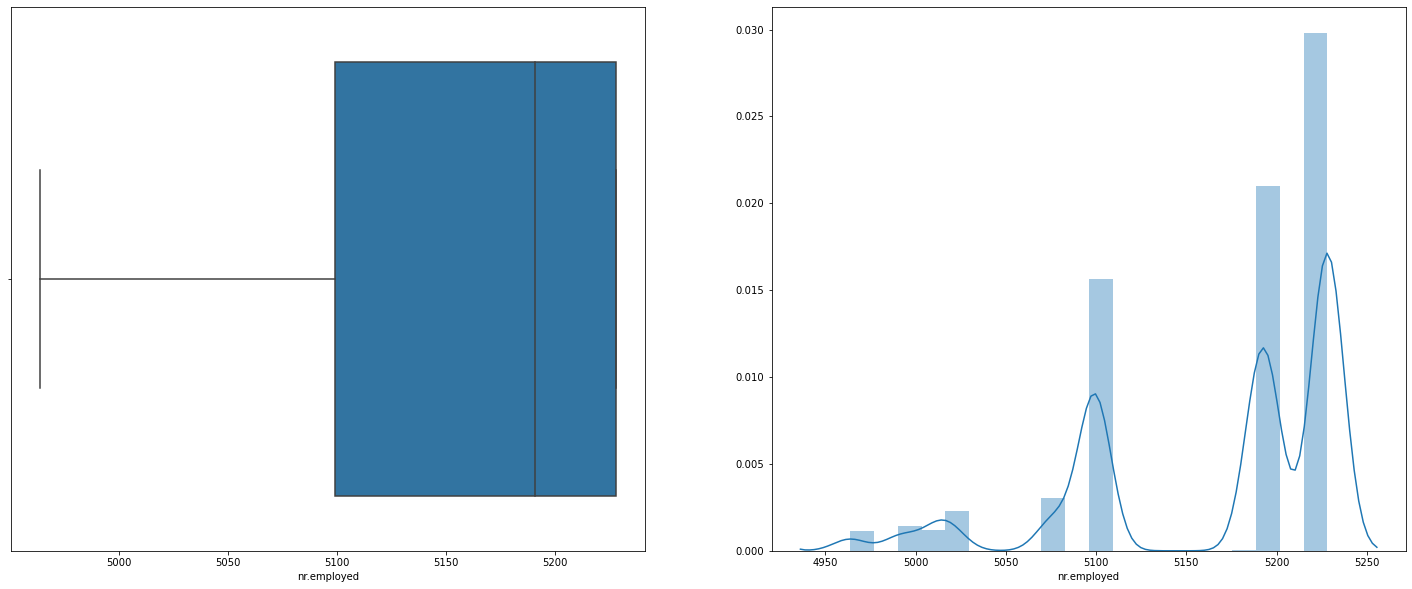

In [10]:
df_bank_nr_features     = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for feature in df_bank_nr_features:
    y = df_bank[feature]
    plt.figure(figsize = (25,10))
    plt.subplot(1,2,1)
    sns.boxplot(y)
    plt.subplot(1,2,2)
    sns.distplot(y, bins =20)
    plt.show()
   

#### The above distribution plots assist in observing features for outliers.

#### 3.2.2 Using IQR rule to identify potential outliers

In [11]:
df_bank_nr_features = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for feature in df_bank_nr_features:
    stat_feature = df_bank[feature].describe()
#     print(stat_feature)
    IQR   = stat_feature['75%'] - stat_feature['25%']  # finding the IQR range 
    upper = stat_feature['75%'] + 1.5 * IQR  # 3rd quartile
    lower = stat_feature['25%'] - 1.5 * IQR  # 1st quartile
    print('For the feature {} the upper boundary is {} and lower boundary is {}'.format(feature,upper, lower))

For the feature age the upper boundary is 69.5 and lower boundary is 9.5
For the feature duration the upper boundary is 644.5 and lower boundary is -223.5
For the feature campaign the upper boundary is 6.0 and lower boundary is -2.0
For the feature pdays the upper boundary is 999.0 and lower boundary is 999.0
For the feature previous the upper boundary is 0.0 and lower boundary is 0.0
For the feature emp.var.rate the upper boundary is 6.200000000000001 and lower boundary is -6.6000000000000005
For the feature cons.price.idx the upper boundary is 95.3725 and lower boundary is 91.69650000000001
For the feature cons.conf.idx the upper boundary is -26.949999999999992 and lower boundary is -52.150000000000006
For the feature euribor3m the upper boundary is 10.3865 and lower boundary is -4.081499999999999
For the feature nr.employed the upper boundary is 5421.6 and lower boundary is 4905.6


#### 3.2.3 Examinings potential outlier

In [12]:
df_bank[(df_bank.age < 9.5)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [13]:
df_bank[(df_bank.age > 69.5)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
df_bank[(df_bank.duration < -223.5)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [15]:
df_bank[(df_bank.duration > 4000)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no


In [16]:
df_bank[(df_bank.campaign < -2.0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [17]:
df_bank[(df_bank.campaign > 40)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [18]:
df_bank[(df_bank.pdays < 200)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,1,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,...,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes


In [19]:
df_bank[(df_bank['cons.conf.idx'] > -30)& (df_bank.y == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37890,39,entrepreneur,married,basic.6y,no,yes,no,cellular,sep,tue,...,2,16,1,success,-3.4,92.379,-29.8,0.819,5017.5,yes
37903,33,admin.,married,high.school,no,yes,no,cellular,sep,tue,...,1,999,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,yes
37904,54,admin.,married,unknown,no,yes,no,cellular,sep,tue,...,1,999,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,yes
37905,79,retired,married,basic.9y,no,no,no,cellular,sep,tue,...,1,999,1,failure,-3.4,92.379,-29.8,0.819,5017.5,yes
37906,39,entrepreneur,married,basic.6y,no,yes,no,cellular,sep,tue,...,2,999,0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38594,59,technician,married,basic.9y,no,no,no,cellular,oct,fri,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38595,25,student,single,high.school,no,no,no,cellular,oct,fri,...,1,999,1,failure,-3.4,92.431,-26.9,0.720,5017.5,yes
38596,69,retired,married,basic.4y,no,yes,yes,cellular,oct,fri,...,3,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38597,18,student,single,basic.6y,no,no,yes,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes


In [20]:
# As campaign feature adds skewness and doesnot posses any confirmed term deposits with only few instances above the "40".So we can drop those feature considering to be outlier.
df_bank = df_bank[(df_bank.campaign < 40)]


###### After going through all the other possible outliers, it seems that term deposit is displayed across varying factors and any fixed pattern cannot be observed to remove outliers. Moreover, majority of subscribers for termed deposit are observed  either below or above upper boundary for all feautres considered.Since we only have 1499 instances of confirmed term subscribers i think removing possible outliers will affect the model.

In [21]:
# Since duration affects our target as per documentation obtained from source
df_bank = df_bank.drop('duration',axis =1)

#### 3.2.4 Distribution/cross-correlation plot with respect to the target feature

In [22]:
# Now, converting out target variable y in to boolean values using encoding.
df_bank['y'] = df_bank.y.map({'yes':1, 'no':0})


/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


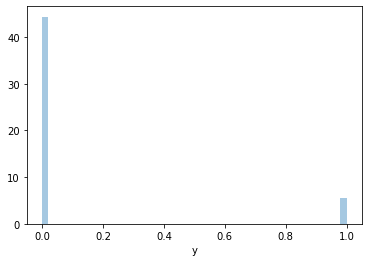

In [23]:
# Having a look at the distibution plot for the response variable
sns.distplot(df_bank.y)

In [24]:
# fetching numerical variables other than "duration"

df_bank_nr_features = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [25]:
# functions for implementing boxplots and correlation for the numerical explanatory features to understand their distribution with respect to the  term deposit

def boxplots_features_target(size, target, features, data):
    plt.figure(figsize = size)
    for each in range(len(df_bank_nr_features)):
        plt.subplot(5,3, each+1)
        sns.boxplot(x = target, y = features[each], data = data)
        
def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize = (10,6))
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    print(corr)
    

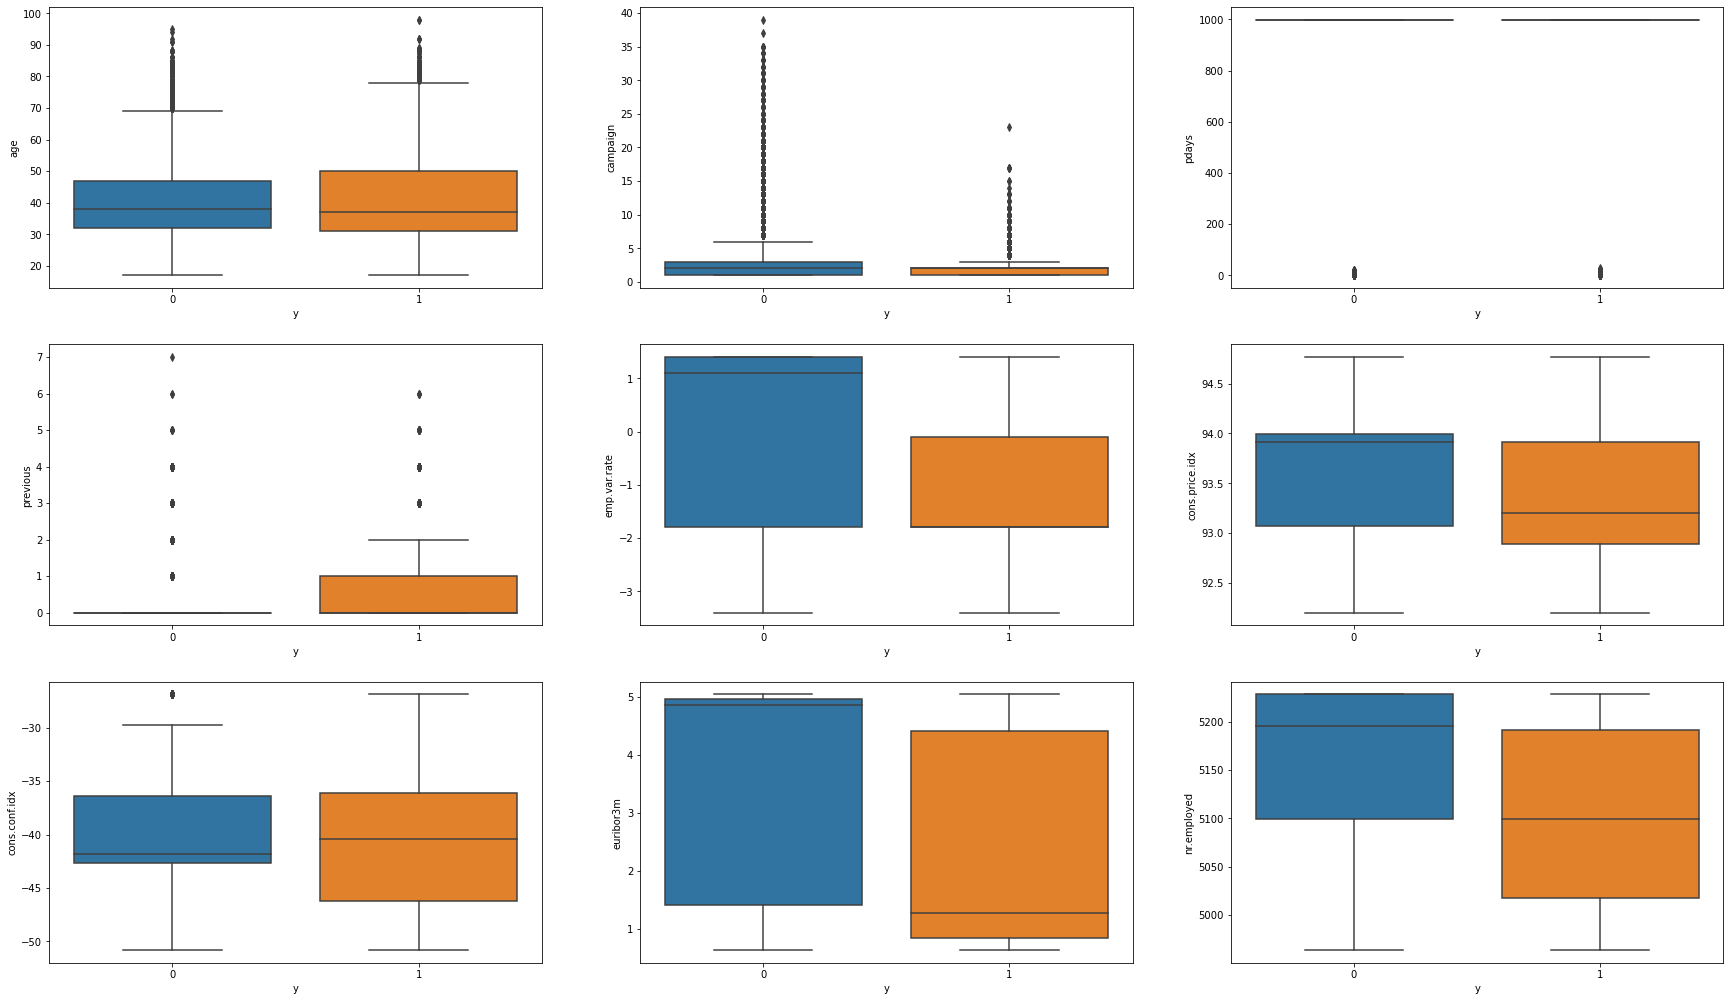

In [26]:
# creating boxplots with respect to target variable:
boxplots_features_target((30,30), 'y' , df_bank_nr_features, df_bank )

                     age  campaign     pdays  previous  emp.var.rate  \
age             1.000000  0.004807 -0.034384  0.024382     -0.000250   
campaign        0.004807  1.000000  0.053197 -0.079910      0.151898   
pdays          -0.034384  0.053197  1.000000 -0.587504      0.271051   
previous        0.024382 -0.079910 -0.587504  1.000000     -0.420564   
emp.var.rate   -0.000250  0.151898  0.271051 -0.420564      1.000000   
cons.price.idx  0.000982  0.128134  0.078894 -0.203158      0.775275   
cons.conf.idx   0.129133 -0.014316 -0.091381 -0.050925      0.196275   
euribor3m       0.010849  0.135971  0.296935 -0.454551      0.972241   
nr.employed    -0.017629  0.145456  0.372653 -0.501396      0.906943   
y               0.030384 -0.066785 -0.324939  0.230183     -0.298256   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
age                   0.000982       0.129133   0.010849    -0.017629   
campaign              0.128134      -0.014316   0.135971     

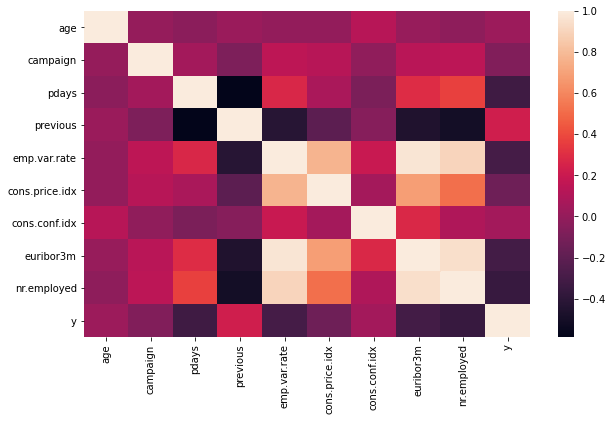

In [27]:
# cross correlation plot
crossCorrelation(df_bank)

###### Our target feature "y", which refers to term deposit doesnot display strong correlation with any feature.

#### Distribution plots with respect to our target 

/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


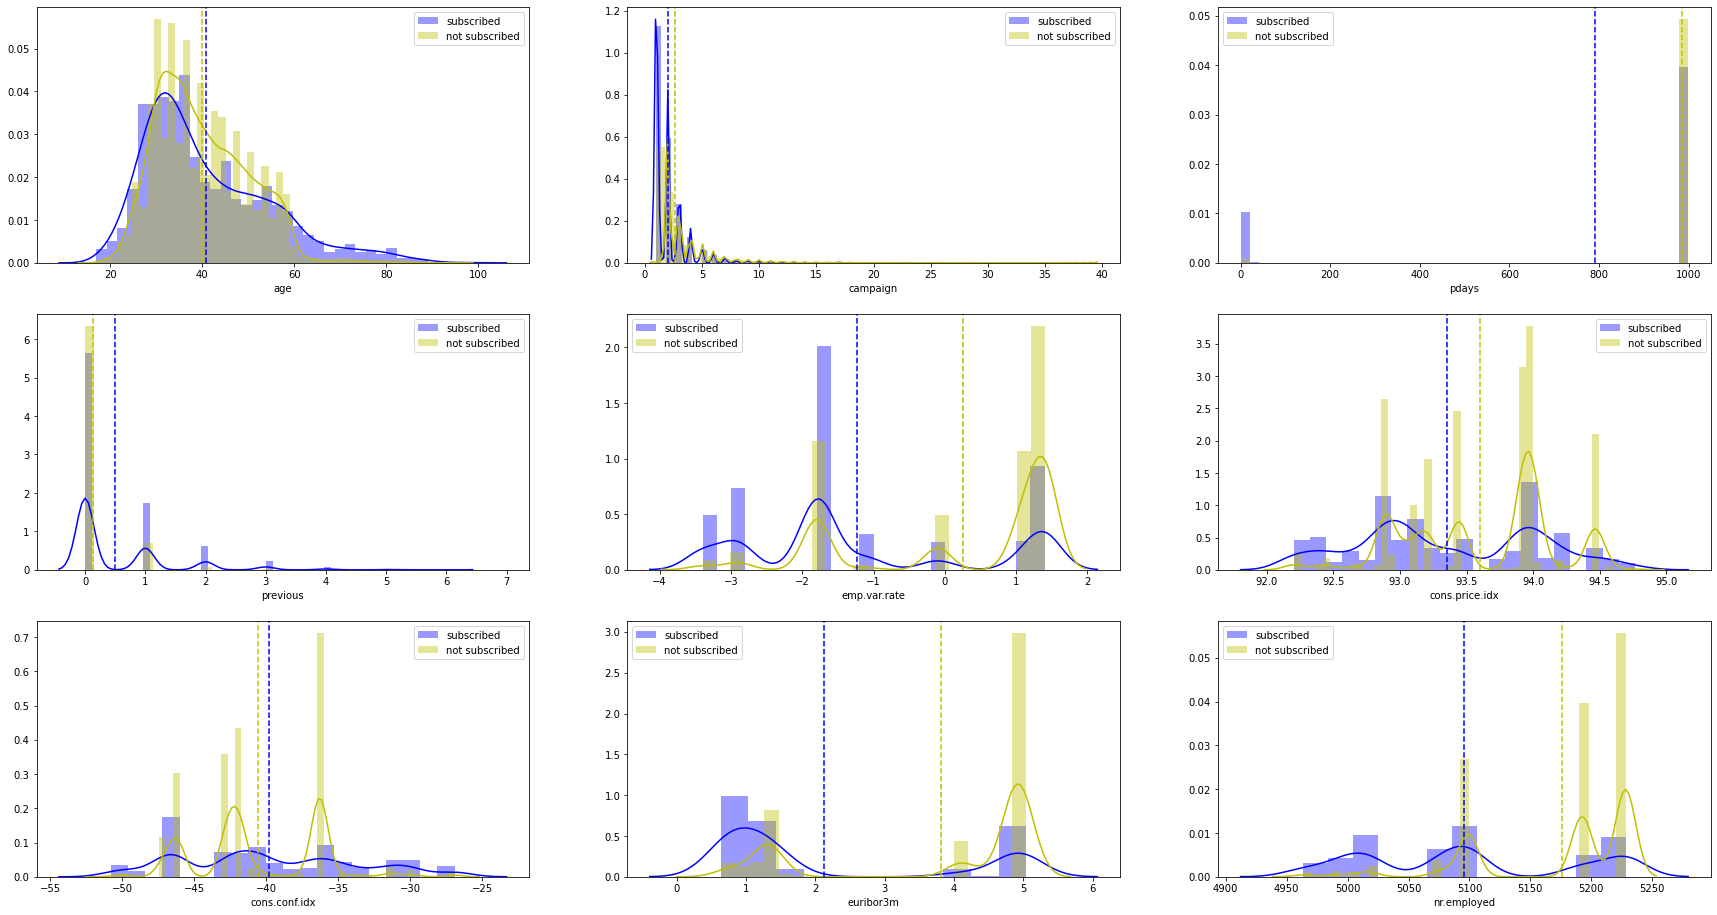

In [28]:
#subsetting our response variable 
term_subscribers = df_bank["y"] == 1
term_non_subscribers = df_bank["y"] == 0

#creating plots
df_bank_nr_features
labels = ["subscribed", "not subscribed"]

def creating_dist_target_feature_plots(df_bank_nr_features,labels):
    plt.figure(figsize = (30,16))
    for feature in df_bank_nr_features:
        plt.subplot(3,3, df_bank_nr_features.index(feature)+1)
        sns.distplot(df_bank[feature][term_subscribers], label = labels[0], color = "b")
        sns.distplot(df_bank[feature][term_non_subscribers], label = labels[1], color = "y")
        plt.axvline(df_bank[feature][term_subscribers].mean(), linestyle = '--', color = "b")
        plt.axvline(df_bank[feature][term_non_subscribers].mean(), linestyle = '--', color = "y")
        plt.legend()
        
creating_dist_target_feature_plots(df_bank_nr_features,labels)

#### Analysis made from our explanatory feature analysis.

###### 1.When customers are in the range of 30-35 yrs in age, hjigher concentration of term deposits has been observed.

###### 2.When no of contacts initiated under the campaign if under 2.5, then it displays higher presence of term deposits made.

###### 3.When days passed after last contact is under 50days from the last contacted campaign then there is opportunnity of term deposits to be made as observed with the current data set.But major term deposits were made by the customers who were not contacted previously in other campaigns.

###### 4.When less than 2 contacts are performed, then customers tend to display higher term deposits as seen in the case of "previous" feature.

###### 5.When employee variation rate is under "-1", data  provides explainations for high customer concentration that have subscribed to term deposits.

###### 6. Other factors such as changes in price of  banking services if lies in the range of 92.87 - 94, higher concentration of term deposits have been displayed by the customers.

###### 7. When consumer confidence index is less than "-35", more no of customers tend to subscribe to term deposits.

###### 8. When average rate of interest is less or in specific less than "2" then customers have displayed higher term deposit instances.

###### 9. When no of employees employed are above "5000" higher concentration of term deposits have been observed. 


the mean for the category job is: 3430.67
the standard deviation for the category job is: 3472.54
the mean for the category marital is: 10292.0
the standard deviation for the category marital is: 10832.11
the mean for the category education is: 5146.0
the standard deviation for the category education is: 4073.12
the mean for the category default is: 13722.67
the standard deviation for the category default is: 16878.86
the mean for the category housing is: 13722.67
the standard deviation for the category housing is: 11126.08
the mean for the category loan is: 13722.67
the standard deviation for the category loan is: 17698.93
the mean for the category contact is: 20584.0
the standard deviation for the category contact is: 7847.47
the mean for the category month is: 4116.8
the standard deviation for the category month is: 4250.8
the mean for the category day_of_week is: 8233.6
the standard deviation for the category day_of_week is: 325.0
the mean for the category poutcome is: 13722.67
the

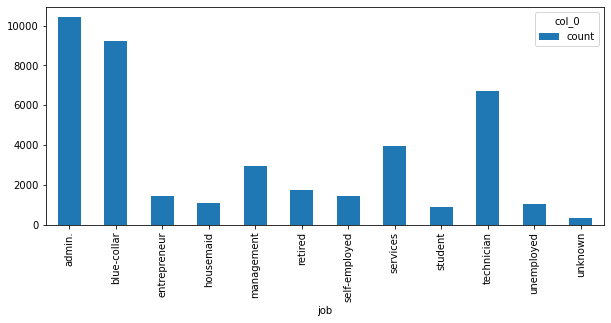

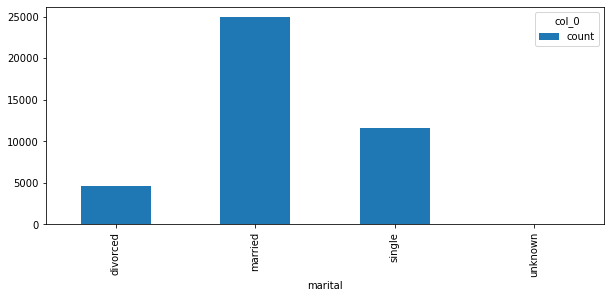

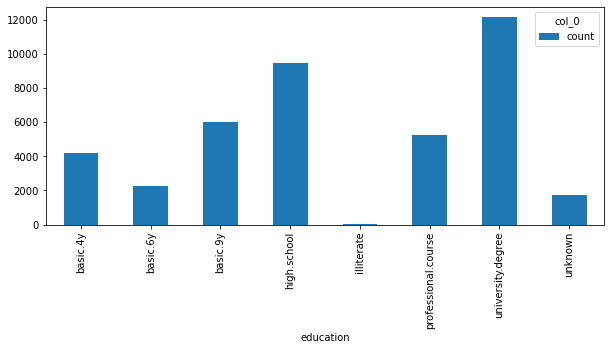

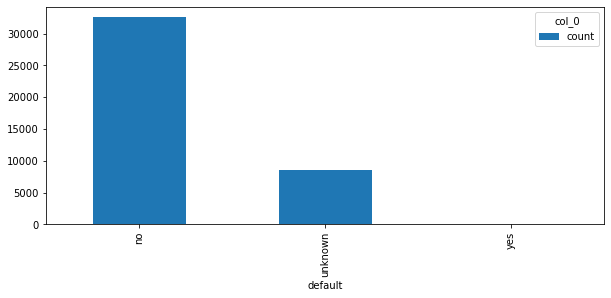

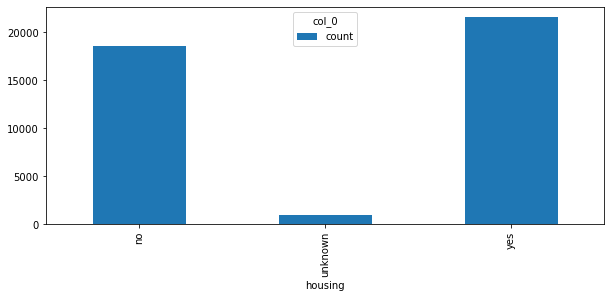

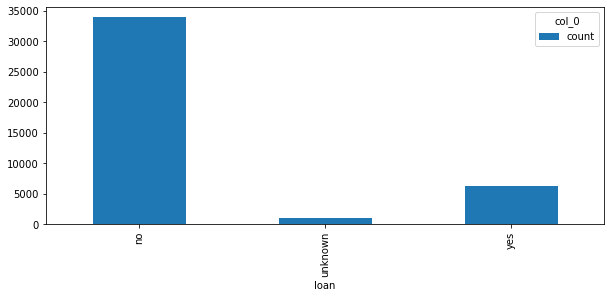

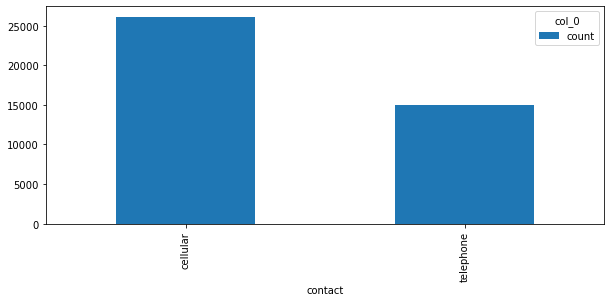

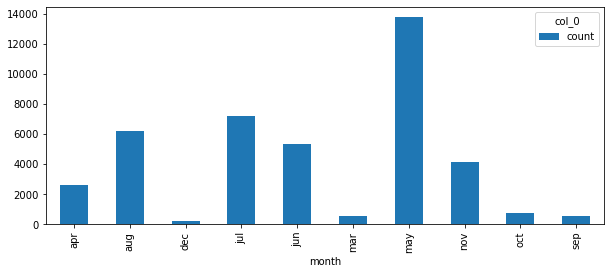

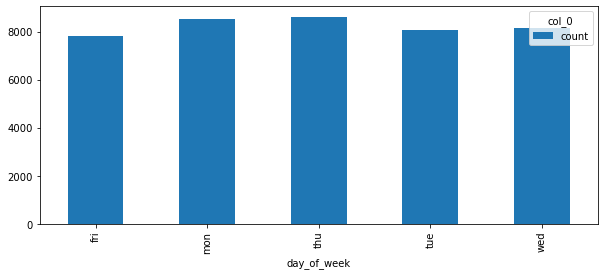

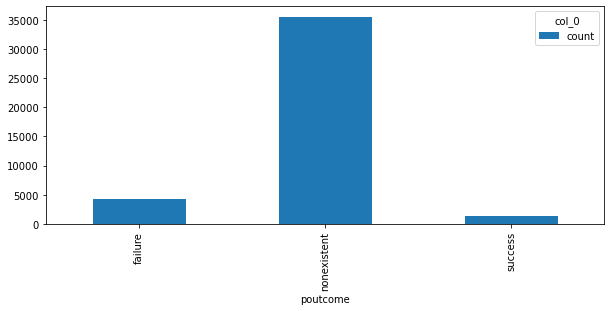

In [29]:
# plotting bar plots of our categorical features to see count instances of categorical values

df_bank_cat_features = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]

for cat in df_bank_cat_features:
    cat_table = pd.crosstab(index = df_bank[cat],columns = "count")
    cat_table.plot.bar(figsize=(10,4))
    print("the mean for the category {} is: {}".format( cat,round(np.mean(cat_table["count"]),2)))
    print("the standard deviation for the category {} is: {}".format( cat,round((cat_table["count"].std()),2)))
    


#### 3.3 Skewed features
Transforming features to avoid bias due to distribution. We are applying logarithmic transformation to reduce the effect of outliers and reduce the range of distribution


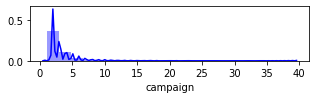

In [30]:
#As, we had seen above in the distribution plots we observed right skewness in "campaign"

plt.figure(figsize = (5,1))
sns.distplot(df_bank["campaign"], bins =20 , color = "b")


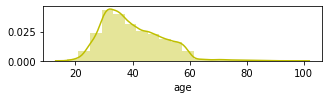

In [31]:
#As, we had seen above in the distribution plots we observed right skewness in "age"
plt.figure(figsize = (5,1))
sns.distplot(df_bank["age"], bins =20, color = "y")

In [32]:
df_bank_processed = df_bank.copy()

#### 3.3.1 Skewed Features: Log Transform

In [33]:
#applying log transformation to handle the skewness

df_bank_processed["age"] = np.log(df_bank_processed["age"]+1)
df_bank_processed["campaign"] = np.log(df_bank_processed["campaign"]+1)

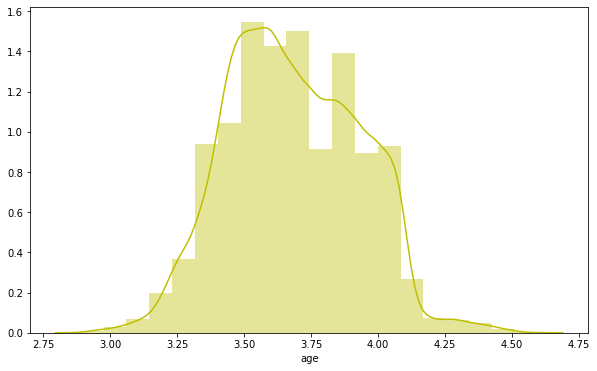

In [34]:
plt.figure(figsize = (10,6))
sns.distplot(df_bank_processed["age"], bins =20, color = "y")

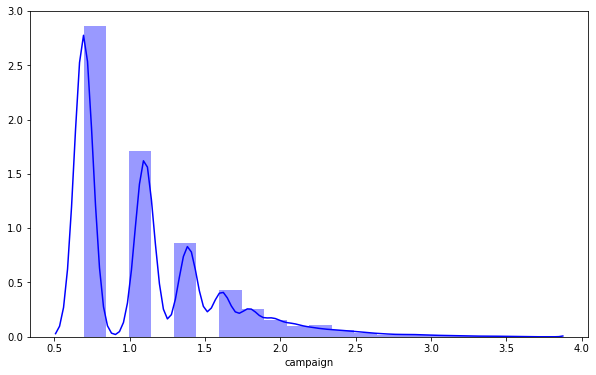

In [35]:
plt.figure(figsize = (10,6))
sns.distplot(df_bank_processed["campaign"], bins =20, color = "b")

#### 3.3.2 Normalization of Numerical Features

In [36]:
scaler = MinMaxScaler() #initiating a scaler and applying features to it
df_bank_processed[df_bank_nr_features] = scaler.fit_transform(df_bank_processed[df_bank_nr_features]) # applying noramlisation to numerical variables



In [37]:
df_bank_processed.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.676158,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.686360,services,married,high.school,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.438314,services,married,high.school,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.482887,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.676158,services,married,high.school,no,no,yes,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
5,0.550386,services,married,basic.9y,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
6,0.706247,admin.,married,professional.course,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
7,0.497022,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
8,0.192699,technician,single,professional.course,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
9,0.215706,services,single,high.school,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0


#### 3.3.3 Processing Categorical Feature: One Hot- Encoding

In [38]:
#grouping education feature containing basic into one common Basic.
df_bank_processed['education'] = np.where(df_bank_processed['education']=='basic.9y','Basic',df_bank_processed['education'])

df_bank_processed['education'] = np.where(df_bank_processed['education']=='basic.6y','Basic',df_bank_processed['education'])

df_bank_processed['education'] = np.where(df_bank_processed['education']=='basic.4y','Basic',df_bank_processed['education'])

In [39]:
# encoding categorical values with get_dummies method to utilise categorical features for the purpose of modelling
df_bank_processed_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week',  'poutcome']
df_bank_processed = pd.get_dummies(data = df_bank_processed, columns = df_bank_processed_cat )

# ---4.Model Selection---
###### In this segment, we will be implementing multiple algorithms that will assist us in classification of a customer .

#### 4.1 Training And Test Datasets 

In [40]:
#splitting oour data sets into train and test features.

X,y = df_bank_processed.drop(["y"],1).values, df_bank_processed["y"].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)


In [41]:
# check the recorded instances of Train and test data sets for X nd y

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32934, 60)
(32934,)
(8234, 60)
(8234,)


In [42]:
#using logisitic regression unoptimised version to find f score and accuracy

parameters = {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_model_before_smote = LogisticRegression(random_state = 42, penalty = "l2")

fbeta_scorer = make_scorer(fbeta_score, beta = 0.5) #fbeta score

grid_item = GridSearchCV(log_model_before_smote, param_grid = parameters, scoring = fbeta_scorer) #grid search on the classsifier using 'scorer' as the scoring method

grid_fit = grid_item.fit(X_train, y_train) #fitting grid search to training data and find optimal parameters using fit()

best_estimators = grid_fit.best_estimator_ #get the estimator

best_predictions = best_estimators.predict(X_test) #predictions on unoptimised model

print("\nUnoptimised Model\n----")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test,best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test,best_predictions, beta = 0.5)))
print(best_estimators)


/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin


Unoptimised Model
----
Final accuracy score on the testing data: 0.8991
Final F-score on the testing data: 0.4643
LogisticRegression(C=1, random_state=42)


/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# using parameters obtained above to make an optimised logistitc model

parameters = {"C":[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6 ]}
log_model_before_smote = LogisticRegression(random_state = 42, penalty = "l2")

fbeta_scorer = make_scorer(fbeta_score, beta = 0.5) #fbeta score

grid_item = GridSearchCV(log_model_before_smote, param_grid = parameters, scoring = fbeta_scorer) #grid search on the classsifier using 'scorer' as the scoring method

grid_fit = grid_item.fit(X_train, y_train) #fitting grid search to training data and find optimal parameters using fit()

best_estimators = grid_fit.best_estimator_ #get the estimator

best_predictions = best_estimators.predict(X_test) #predictions on unoptimised model

print("\nOptimised Model\n----")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test,best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test,best_predictions, beta = 0.5)))
print(best_estimators)

/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/sreetamkumar


Optimised Model
----
Final accuracy score on the testing data: 0.8991
Final F-score on the testing data: 0.4643
LogisticRegression(C=1, random_state=42)


/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Now, using the model with optimised parameters to predict and get the confusion matrix

model_log = LogisticRegression(C=1, random_state=42,penalty = "l2")
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)

conf_matrix = confusion_matrix(y_pred_log,y_test)
print(conf_matrix)
print(classification_report(y_test, y_pred_log))


[[7208  733]
 [  98  195]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7306
           1       0.67      0.21      0.32       928

    accuracy                           0.90      8234
   macro avg       0.79      0.60      0.63      8234
weighted avg       0.88      0.90      0.87      8234



/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Since, we had earlier observed distribution of our target feature is imbalanced. So we are using oversampling followed by undersampling with the help of SMOTETomek method to balance out the instances within our target feature.

In [45]:
# since earlier we had found that our response variable classes are imbalanced so we decided to use Smote and Tomek method to perform mix of oversmapling and undersampling to balance both outcomes across our response variable.
X_columns = df_bank_processed.drop(["y"],1).columns
smote_tomek  = SMOTETomek(sampling_strategy = 'auto')
X_smt, y_smt = smote_tomek.fit_sample(X_train, y_train)

df_X_smt = pd.DataFrame(data = X_smt, columns = X_columns)
df_y_smt = pd.DataFrame(data = y_smt, columns = ['y'])


#print statements to check 

print("length of oversampled data is ",len(df_y_smt))
print("percentage of subscription ", (len(df_y_smt[df_y_smt['y']== 1])/len(df_y_smt))*100)
print("percentage of no subscription ",(len(df_y_smt[df_y_smt['y']== 0])/len(df_y_smt))*100)


length of oversampled data is  57648
percentage of subscription  50.0
percentage of no subscription  50.0


#### 4.2 Model Selection

In [46]:
#Now, performing logistic regression with sampled features 

model_lr = LogisticRegression(random_state = 42, penalty = "l2")
model_rfc = RandomForestClassifier(n_estimators= 200, max_features= 'auto', max_depth= 20 , criterion= 'gini')

list_model = [model_lr, model_rfc]
for model in list_model:
    rfe = RFE(model,n_features_to_select = 20)
    X_smt_rfe = rfe.fit_transform(X_smt, y_smt)
    X_test_rfe = rfe.transform(X_test)
    # model  = model.fit(X_smt_rfe,y_smt)
    no_stratified_folds = StratifiedKFold(n_splits = 5, random_state= 1 )
    crossval_score_model = cross_val_score(model,X_smt_rfe ,y_smt, scoring = 'accuracy', cv = no_stratified_folds,n_jobs= 1, error_score='raise'  )
    print("Accuracy for model {} is : {}".format(model,np.mean(crossval_score_model)))
    print("Standard deviation for model {} is : {}".format(model,np.std(crossval_score_model)))

/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Accuracy for model LogisticRegression(random_state=42) is : 0.7419858591069828
Standard deviation for model LogisticRegression(random_state=42) is : 0.0030516746124038055


/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Accuracy for model RandomForestClassifier(max_depth=20, n_estimators=200) is : 0.9349682872942224
Standard deviation for model RandomForestClassifier(max_depth=20, n_estimators=200) is : 0.05109400865795264


###### As compared with the previous logistic model the new logistic model with sampled information did not perform well.

In [47]:
#So we are, performing Random forest classification with sampled features 

model_rfc = RandomForestClassifier(n_estimators= 200, max_features= 'auto', max_depth= 20 , criterion= 'gini')

rfe = RFE(model_rfc,n_features_to_select = 5)
X_smt_rfe = rfe.fit_transform(X_smt, y_smt)
X_test_rfe = rfe.transform(X_test)
model_rfc.fit(X_smt_rfe,y_smt)
y_pred = model_rfc.predict(X_test_rfe)
conf_matrix_rfe = confusion_matrix(y_test,y_pred)
print(conf_matrix_rfe)
print(classification_report(y_test, y_pred))

[[6908  398]
 [ 570  358]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7306
           1       0.47      0.39      0.43       928

    accuracy                           0.88      8234
   macro avg       0.70      0.67      0.68      8234
weighted avg       0.87      0.88      0.88      8234



###### The above logic has been tested on features in the range [5,10,20]. The above model after processing provides lowest precison and recall values with "5"no of features

###### When compared with the optimised logistic regression model without sampling , this model performs on par and even decreases the precision indicating the decrease in False Positives. Although we did observe a bump in the recall indicating the increase in False Negatives.


#### 4.3 Confusion Matrix, Precision, Recall, F1-Score

In [48]:
def metrics_model(y_test, y_pred):
    conf_matrix_rfe = confusion_matrix(y_test,y_pred)
    TP = conf_matrix_rfe[1,1]
    FN = conf_matrix_rfe[1,0]
    FP = conf_matrix_rfe[0,1]
    TN = conf_matrix_rfe[0,0]
    
    #printing confusion matrix
    
    print("confusion matrix:\n",conf_matrix_rfe)
    
    #print the accuracy score
    print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
    
    #print the sensitivity/recall/true positive rate
    print("Sensitivity:", round(recall_score(y_test, y_pred),2))
    
    #precision/positive predictive value
    print("Precision:", round(precision_score(y_test, y_pred),2))
    
    
    
    

In [49]:
print(metrics_model(y_test, y_pred))

confusion matrix:
 [[6908  398]
 [ 570  358]]
Accuracy: 0.88
Sensitivity: 0.39
Precision: 0.47
None


In [50]:
# let's see if increaing threshold could reduce false positives

y_pred_prob = model_rfc.predict_proba(X_test_rfe)[:,1]
y_pred_threshold = np.where(y_pred_prob< 0.45, 0 , 1)

In [51]:
metrics_model(y_test, y_pred_threshold)

confusion matrix:
 [[6850  456]
 [ 539  389]]
Accuracy: 0.88
Sensitivity: 0.42
Precision: 0.46


###### After decreasing the threshold of the model to 0.45 , we can decrease the false negative with some increase in false positives.

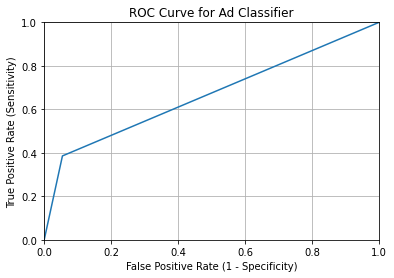

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve for Ad Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

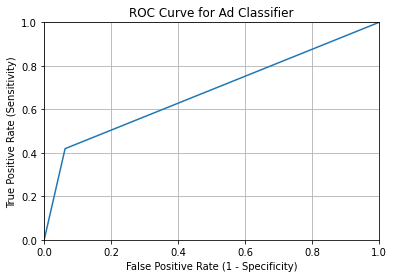

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_threshold)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve for Ad Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

###### As we can see that, the True Positive vs False positive rate is better provided by decreasing model threshold to 0.45

# ---5.Actionable recommendations---

In [54]:
# We had ealrier kept a dataframe of the sampled outcome, which has been used now to fetch the feature names that have been selected by rfe.
columns = df_X_smt.columns
val = pd.Series(rfe.support_,index = columns)
features_chosen_rfe = val[val==True].index 
print(features_chosen_rfe)

Index(['age', 'campaign', 'emp.var.rate', 'euribor3m', 'nr.employed'], dtype='object')


###### The important features that the model has identified to be potential explanatory causes are:'age', 'campaign', 'cons.conf.idx', 'euribor3m', 'nr.employed'

###### Now we will again look through their distributions  

Statistical description of the feature age: count    41168.000000
mean        40.023781
std         10.420833
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


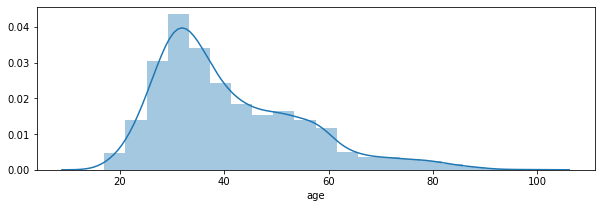

Statistical description of the feature campaign: count    41168.000000
mean         2.559949
std          2.710688
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         39.000000
Name: campaign, dtype: float64


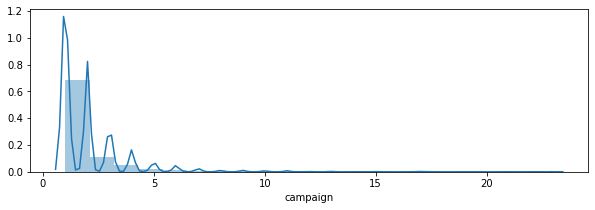

Statistical description of the feature cons.conf.idx: count    41168.000000
mean       -40.502939
std          4.628130
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


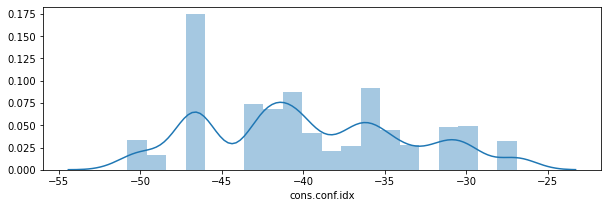

Statistical description of the feature euribor3m: count    41168.00000
mean         3.62104
std          1.73451
min          0.63400
25%          1.34400
50%          4.85700
75%          4.96100
max          5.04500
Name: euribor3m, dtype: float64


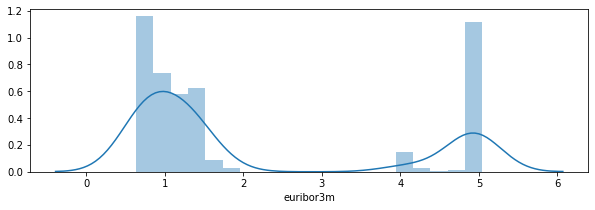

Statistical description of the feature nr.employed: count    41168.000000
mean      5167.025707
std         72.254960
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


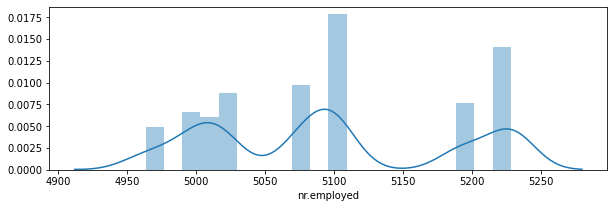

In [55]:
potential_features = ['age', 'campaign', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for feature in potential_features:
    y = df_bank[feature][df_bank['y']== 1]
    print("Statistical description of the feature {}: {}".format(feature,df_bank[feature].describe()))
    plt.figure(figsize = (10,3))
    sns.distplot(y, bins =20)
    plt.show()
    


#### Recommendations as per our model.

###### 1.As per our model the bank should focus on these aspects namely : 'age', 'campaign', 'cons.conf.idx', 'euribor3m', 'nr.employed', to drive the no of customers subscribing to term deposits.

###### 2.When we compared the feature engineered model with the one without feature engineering, there was 45% decrease in the false positives.Thus, making the business process for the bank more resource efficient.

###### 3.Within age customers within the age range 32-47 displayed more no of term subscriptions.

###### 4.No of contacts to be performed under campaign should focus more on the first two contacts as that represents higher chances for term subscriptions.

###### 5.With consumer 'cons.conf.idx','euribor3m'and 'nr.employed' the business model should focus on experimenting with the needs of the customer as no clear patterns were observed.



